In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import sklearn
import datetime

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
from scipy import stats

In [4]:
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv', dtype = kc_dtypes, parse_dates = ['date'])

kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')
#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data['waterfront'] = kc_data['waterfront'].fillna(146/19221)
kc_data['view'] = kc_data['view'].fillna((957 + (508*2) + (330*3) + (317*4))/21534)

In [5]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int32         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int32         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int32         
 6   sqft_lot       21597 non-null  int32         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  float64       
 11  grade          21597 non-null  int32         
 12  sqft_above     21597 non-null  int32         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int32         
 15  yr_renovated   1775

In [6]:
# model cannot handle dates? 
# cannot find a singe question mark by searching but getting errors so swapping for 0
# honestly 0 fills all pretty well, it's the mode of most of them and means 'none' for things like basements, which aren't 
# common here 
kc_data = kc_data.drop('date', axis=1).copy() 
kc_data = kc_data.replace({ '?' : '0'}).copy()
kc_data = kc_data.fillna('0').copy()

In [7]:
# seperate your x and y, here I am looking at price 
kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)

In [8]:
# initialize regression
reg = linear_model.LinearRegression()

In [9]:
# split data into 80/20 training/testing
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [10]:
# train the model 
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
# print coefficients for each feat/column 
print(reg.coef_)

[[-3.74795857e-07 -3.86967233e+04  4.24178541e+04  1.00165794e+02
   1.01226184e-01  9.18601382e+03  6.03902948e+05  5.26429382e+04
   2.85288737e+04  9.86813482e+04  7.92629636e+01  5.31652307e+01
  -2.69525172e+03  2.21158188e+01 -5.64058150e+02  5.88407220e+05
  -2.10705033e+05  2.49129195e+01 -4.45697714e-01]]


In [12]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred

array([[ 80554.56957585],
       [383192.37801454],
       [191513.04388273],
       ...,
       [506799.50450133],
       [323985.88057354],
       [217290.52986466]])

In [13]:
#print vaalues
y_test7u

,price
3686,132500.0
10247,415000.0
4037,494000.0
3437,355000.0
19291,606000.0
...,...
2522,175000.0
11119,394950.0
11973,437000.0
17601,293000.0


In [14]:
# check accuracy with mean sq 
print(np.mean((y_pred - y_test)**2))

price    3.984944e+10
dtype: float64


In [15]:
# check accuracy with mean sq 
print(mean_squared_error(y_test, y_pred))
# very innaccurate? 

39849439175.14964


In [16]:
def calc_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(y_test, y_pred)

price    0.706947
dtype: float64

In [17]:
#reassign to save space?
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv', dtype = kc_dtypes, parse_dates = ['date'])

kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')

# same drops
kc_data = kc_data.drop('date', axis=1).copy() 
kc_data = kc_data.replace({ '?' : '0'}).copy()
kc_data = kc_data.fillna('0').copy()


kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)

#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data['waterfront'] = kc_data['waterfront'].fillna(146/19221)
kc_data['view'] = kc_data['view'].fillna((957 + (508*2) + (330*3) + (317*4))/21534)

In [96]:
#Trying KNN
# maybe try 60% train , 20% adj, 20% test?
cv = KFold(n_splits=10)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=5)

In [19]:
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, k_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, k_pred), 2)))
print('Slope: ' + str(calc_slope(kcy, k_pred)))

RMSE:  172283.49
R Squared: 0.78
Slope: price    0.711626
dtype: float64


In [20]:
kc_data.var()

id               1.424928e+18
price            1.349594e+11
bedrooms         8.580296e-01
bathrooms        5.913368e-01
sqft_living      8.429189e+05
sqft_lot         1.715006e+09
floors           2.912575e-01
condition        4.232096e-01
grade            1.376397e+00
sqft_above       6.851862e+05
yr_built         8.629044e+02
zipcode          2.863649e+03
lat              1.919659e-02
long             1.980311e-02
sqft_living15    4.695408e+05
sqft_lot15       7.438952e+08
dtype: float64

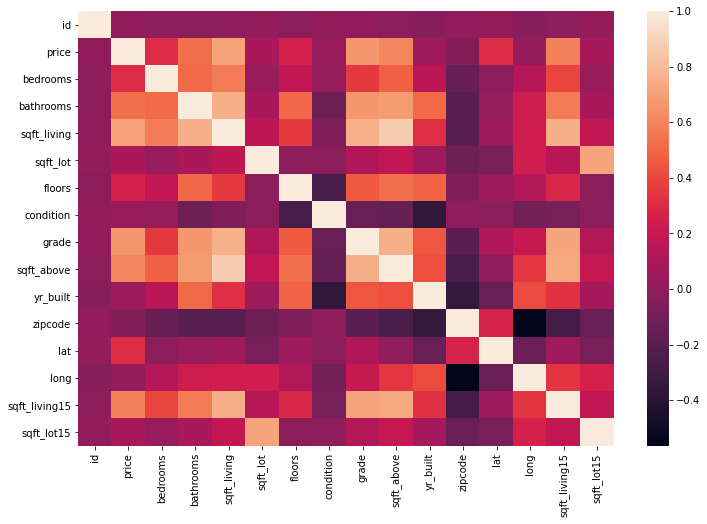

In [21]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()

In [22]:
#reassign to save space?
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv', dtype = kc_dtypes, parse_dates = ['date'])

# new drop, hoping sqft_basement is what's giving me an error, which would make sense bc i cant assign it a dtype 
kc_data = kc_data.drop('date', axis=1).copy() 
kc_data = kc_data.drop('sqft_basement', axis=1).copy() 
kc_data = kc_data.fillna('0').copy()


kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)


In [23]:
#kc_data.loc[kc_data['price'] == 0.0]
kc_data['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

In [24]:
abs(kc_data.corr()['price'])

id               0.009315
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
zipcode          0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [25]:
abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>0.7].drop('price').index.tolist()

['sqft_living']

In [26]:
# rank features by correlation 
# 0.7 returning empty array, .65 best correlation we're getting 

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65]

for val in vals:
    features = abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>val].drop('price').index.tolist()
    
    x = kc_data.drop(columns='price')
    x = x[features]
    
    y_pred = cross_val_predict(classifier_pipeline, x, kcy, cv=cv)
    
    print(features)
    print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
    print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  195765.75
R Squared: 0.72
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  195765.75
R Squared: 0.72
['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  197788.25
R Squared: 0.71
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
RMSE:  233598.39
R Squared: 0.6
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
RMSE:  233598.39
R Squared: 0.6
['sqft_living', 'grade', 'sqft_above']
RMSE:  239910.06
R Squared: 0.57
['sqft_living', 'grade']
RMSE:  244892.09
R Squared: 0.56


In [27]:
# feature selection using wrapper 
kc_data['sqft_living'] = kc_data['sqft_living'].astype('category')
dummies = pd.get_dummies(kc_data['sqft_living'])
kc_dum = kc_data.drop(columns='sqft_living').merge(dummies, left_index=True, right_index=True )

In [28]:
sfs1 = SFS(classifier_pipeline,
          k_features = 16,
          forward = True,
          scoring = 'neg_mean_squared_error',
          cv=cv)

In [29]:
sfs1.fit(kcx, kcy)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('kneighborsregressor',
                                                     KNeighborsRegressor(n_neighbors=10))]),
                          k_features=16, scoring='neg_mean_squared_error')

In [30]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([-7.65405167e+10, -7.41621602e+10, -6.00211772e+10, -7.31923204e+10,
         -5.76794073e+10, -6.87466628e+10, -6.59630158e+10, -6.81309984e+10,
         -6.74036508e+10, -7.26405054e+10]),
  'avg_score': -68448041485.20564,
  'feature_names': ('sqft_living',)},
 2: {'feature_idx': (3, 14),
  'cv_scores': array([-4.94547308e+10, -4.94881853e+10, -3.64698522e+10, -4.71218952e+10,
         -3.35471883e+10, -4.14561617e+10, -3.78249287e+10, -4.24308302e+10,
         -4.08797554e+10, -4.30126042e+10]),
  'avg_score': -42168613208.40287,
  'feature_names': ('sqft_living', 'lat')},
 3: {'feature_idx': (3, 14, 15),
  'cv_scores': array([-3.28274617e+10, -3.27546516e+10, -2.33726538e+10, -3.19668174e+10,
         -2.08911153e+10, -2.57394405e+10, -3.01327467e+10, -2.58881778e+10,
         -3.12339151e+10, -2.84817233e+10]),
  'avg_score': -28328870320.316357,
  'feature_names': ('sqft_living', 'lat', 'long')},
 4: {'feature_idx': (3, 6, 14, 15),


In [31]:
kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)
y_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=cv)
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

RMSE:  166435.19
R Squared: 0.79


In [32]:
kc_data.corr()

,id,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.009315,-0.003970,-0.014791,0.014194,-0.010127,0.012977,0.004629,-0.012019,-0.030486,0.008591,0.016554,-0.032385,-0.005970,0.017982
price,0.009315,1.000000,0.308787,0.525906,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,-0.003970,0.308787,1.000000,0.514508,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,-0.014791,0.525906,0.514508,1.000000,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_lot,0.014194,0.089876,0.032471,0.088373,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,-0.010127,0.256804,0.177944,0.502582,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722
condition,0.012977,0.036056,0.026496,-0.126479,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.004629,0.667951,0.356563,0.665838,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,-0.012019,0.605368,0.479386,0.686668,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,-0.030486,0.053953,0.155670,0.507173,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.347210,-0.148370,0.409993,0.326377,0.070777


In [65]:
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv', dtype = kc_dtypes, parse_dates = ['date'])

kc_data['sqft_basement'] = kc_data['sqft_basement'].replace({'?': 0})
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')

In [66]:
#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data['waterfront'] = kc_data['waterfront'].fillna(146/19221)
kc_data['view'] = kc_data['view'].fillna((957 + (508*2) + (330*3) + (317*4))/21534)
kc_data['yr_renovated'] = kc_data['waterfront'].fillna(0)

In [67]:
z_score = stats.zscore(kc_data[['sqft_basement']])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
kc_data['sqft_basement'] = kc_data['sqft_basement'][filtered_entries]
kc_data = kc_data.dropna(axis=0)

In [68]:
z_score = stats.zscore(kc_data[['sqft_basement']])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
kc_data['sqft_above'] = kc_data['sqft_above'][filtered_entries]
kc_data = kc_data.dropna(axis=0)

In [69]:
# filtering out outliers, any price higher or lower than 3 standard deviations away from the mean 
z_score = stats.zscore(kc_data[['price']])
abs_z_score = np.abs(z_score)
filtered_entries = (abs_z_score < 3).all(axis=1)
kc_data['price'] = kc_data['price'][filtered_entries]
kc_data = kc_data.dropna(axis=0)

In [71]:
kcy = kc_data['price'].to_frame()
kcx = kc_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']]

In [72]:
kcy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20795 entries, 0 to 21596
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   20795 non-null  float64
dtypes: float64(1)
memory usage: 324.9 KB


In [73]:
reg = linear_model.LinearRegression()

In [74]:
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [75]:
reg.fit(x_train, y_train)

LinearRegression()

In [76]:
print(reg.coef_)

[[-1.20253555e+04  2.83430557e+04  8.18099485e+01  1.92936378e-01
   3.75942970e+04  1.08137188e+05  4.08941211e+04  2.40277658e+04
   8.51828538e+04  6.46450766e+00  7.34615292e+00 -2.22134641e+03
   1.08137188e+05 -3.07199757e+02  5.59768129e+05 -8.53983561e+04
   4.61911401e+01 -1.51607712e-01]]


In [77]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred

array([[614275.91184689],
       [305183.3546038 ],
       [517331.52444324],
       ...,
       [180761.35158693],
       [958046.96071214],
       [223726.37163306]])

In [78]:
#print vaalues
y_test

,price
5238,382000.0
9453,310000.0
20025,975000.0
15920,745000.0
5421,780000.0
...,...
4871,498800.0
3550,277500.0
14986,289000.0
4637,898000.0


In [79]:
# check accuracy with mean sq 
print(np.mean((y_pred - y_test)**2))

price    1.801010e+10
dtype: float64


In [80]:
# check accuracy with mean sq 
print(mean_squared_error(y_test, y_pred))
# still bad but a LOT better

18010104231.78156


In [81]:
#Trying KNN
# maybe try 60% train , 20% adj, 20% test?
cv = KFold(n_splits=10, random_state=0)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=5)

C:\Users\fenne\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [82]:
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, k_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, k_pred), 2)))
print('Slope: ' + str(calc_slope(kcy, k_pred)))

RMSE:  112611.16
R Squared: 0.79
Slope: price    0.757267
dtype: float64


In [83]:
kc_data.var()

id               1.426437e+18
price            5.956067e+10
bedrooms         8.218647e-01
bathrooms        5.224567e-01
sqft_living      6.285137e+05
sqft_lot         1.538795e+09
floors           2.899906e-01
waterfront       3.450409e-03
view             4.498414e-01
condition        4.187852e-01
grade            1.177307e+00
sqft_above       5.786675e+05
sqft_basement    1.476807e+05
yr_built         8.640734e+02
yr_renovated     3.450409e-03
zipcode          2.841101e+03
lat              1.957790e-02
long             2.010402e-02
sqft_living15    4.093212e+05
sqft_lot15       6.468731e+08
dtype: float64

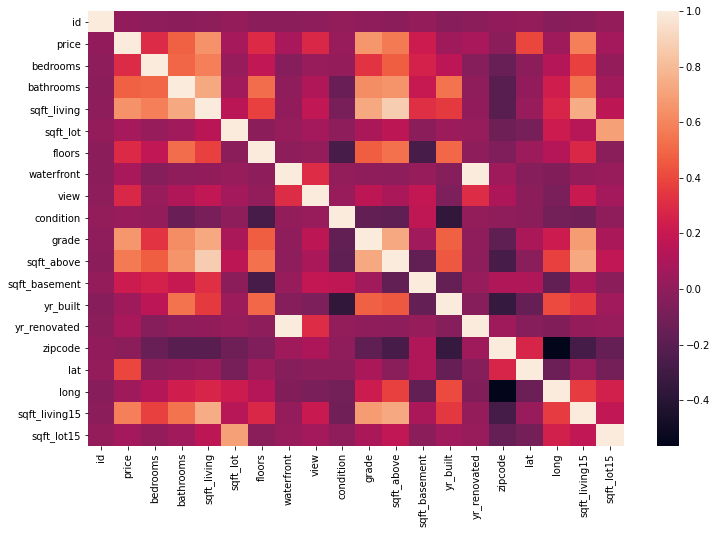

In [84]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()

In [85]:
abs(kc_data.corr()['price']).sort_values(ascending=False)

price            1.000000
grade            0.660759
sqft_living      0.650119
sqft_living15    0.580515
sqft_above       0.561723
bathrooms        0.478876
lat              0.398403
bedrooms         0.300396
floors           0.295103
view             0.285272
sqft_basement    0.221662
yr_renovated     0.085721
waterfront       0.085721
sqft_lot         0.081222
sqft_lot15       0.072784
yr_built         0.057076
long             0.048020
condition        0.028043
zipcode          0.019490
id               0.005672
Name: price, dtype: float64

In [86]:
# rank features by correlation 
# 0.7 returning empty array, .6 best correlation we're getting 

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for val in vals:
    features = abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>val].drop('price').index.tolist()
    
    x = kc_data.drop(columns='price')
    x = x[features]
    
    y_pred = cross_val_predict(classifier_pipeline, x, kcy, cv=cv)
    
    print(features)
    print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
    print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
RMSE:  121253.15
R Squared: 0.75
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
RMSE:  121253.15
R Squared: 0.75
['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  122820.45
R Squared: 0.75
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
RMSE:  167535.96
R Squared: 0.53
['sqft_living', 'grade', 'sqft_above', 'sqft_living15']
RMSE:  170404.44
R Squared: 0.51
['sqft_living', 'grade']
RMSE:  179224.7
R Squared: 0.46


In [87]:
# feature selection using wrapper 
kc_data['sqft_living'] = kc_data['sqft_living'].astype('category')
dummies = pd.get_dummies(kc_data['sqft_living'])
kc_dum = kc_data.drop(columns='sqft_living').merge(dummies, left_index=True, right_index=True )

In [88]:
sfs1 = SFS(classifier_pipeline,
          k_features = 18,
          forward = True,
          scoring = 'neg_mean_squared_error',
          cv=cv)

In [89]:
kcx

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.007596,0.0,3.0,7,1180.0,0.0,1955,0.007596,98178.0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.000000,0.0,3.0,7,2170.0,400.0,1951,0.000000,98125.0,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.000000,0.0,3.0,6,770.0,0.0,1933,0.000000,98028.0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.000000,0.0,5.0,7,1050.0,910.0,1965,0.000000,98136.0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.000000,0.0,3.0,8,1680.0,0.0,1987,0.000000,98074.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.000000,0.0,3.0,8,1530.0,0.0,2009,0.000000,98103.0,47.6993,-122.346,1530,1509
21593,4,2.50,2310,5813,2.0,0.000000,0.0,3.0,8,2310.0,0.0,2014,0.000000,98146.0,47.5107,-122.362,1830,7200
21594,2,0.75,1020,1350,2.0,0.000000,0.0,3.0,7,1020.0,0.0,2009,0.000000,98144.0,47.5944,-122.299,1020,2007
21595,3,2.50,1600,2388,2.0,0.007596,0.0,3.0,8,1600.0,0.0,2004,0.007596,98027.0,47.5345,-122.069,1410,1287


In [90]:
sfs1.fit(kcx, kcy)

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=0, shuffle=False),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('kneighborsregressor',
                                                     KNeighborsRegressor(n_neighbors=10))]),
                          k_features=18, scoring='neg_mean_squared_error')

In [91]:
#hide these from view, very long 
sfs1.subsets_

{1: {'feature_idx': (13,),
  'cv_scores': array([-3.29500568e+10, -3.56648671e+10, -3.52783661e+10, -3.35966654e+10,
         -3.23845255e+10, -3.55981827e+10, -3.26750216e+10, -3.59631814e+10,
         -3.58498636e+10, -4.54076869e+10]),
  'avg_score': -35536841721.00164,
  'feature_names': ('zipcode',)},
 2: {'feature_idx': (8, 13),
  'cv_scores': array([-1.64544430e+10, -1.79353742e+10, -1.57913649e+10, -1.62587728e+10,
         -1.62624165e+10, -1.59236742e+10, -1.62362899e+10, -1.65758279e+10,
         -1.79424317e+10, -2.71792852e+10]),
  'avg_score': -17655988028.15674,
  'feature_names': ('grade', 'zipcode')},
 3: {'feature_idx': (8, 13, 14),
  'cv_scores': array([-1.43399197e+10, -1.63689026e+10, -1.48705452e+10, -1.45212841e+10,
         -1.41725203e+10, -1.42225847e+10, -1.41965476e+10, -1.41840039e+10,
         -1.51560060e+10, -2.42442101e+10]),
  'avg_score': -15627652402.65517,
  'feature_names': ('grade', 'zipcode', 'lat')},
 4: {'feature_idx': (2, 8, 13, 14),
  'cv_sco

In [95]:
# using our top 4 features to build our new model 
kcy = kc_data['price'].to_frame()
kcx = kc_data[['sqft_living', 'grade', 'zipcode', 'lat']].copy()
y_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=cv)
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

RMSE:  109935.35
R Squared: 0.8


In [93]:
kc_data[['price', 'sqft_living', 'grade', 'zipcode', 'lat']].corr()

,price,grade,zipcode,lat
price,1.000000,0.660759,-0.019490,0.398403
grade,0.660759,1.000000,-0.179026,0.100266
zipcode,-0.019490,-0.179026,1.000000,0.273857
lat,0.398403,0.100266,0.273857,1.000000


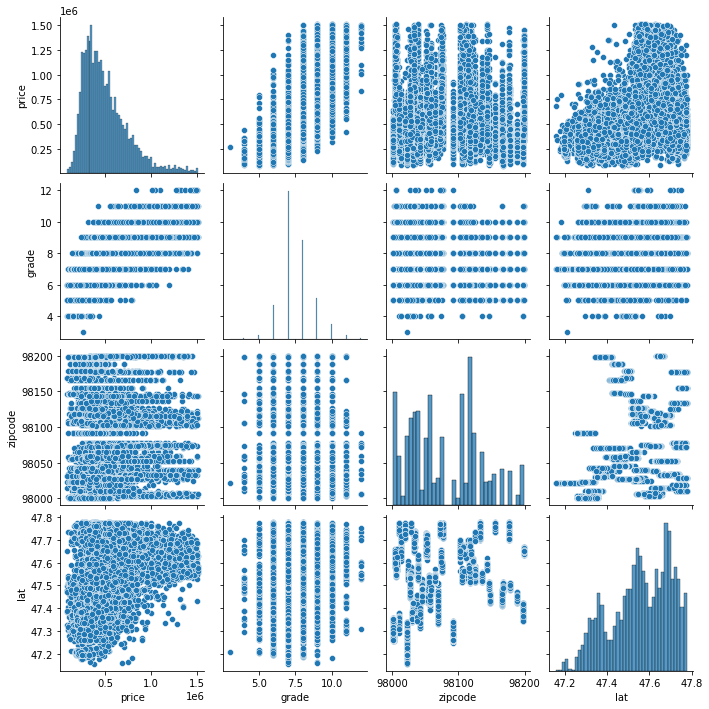

In [94]:
sns.pairplot(kc_data[['price', 'sqft_living', 'grade', 'zipcode', 'lat']])